# BuenColors Helper Functions Demo

This notebook demonstrates all the helper functions available in the BuenColors package.

## Installation

```bash
pip install buencolors
```

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import buencolors

# Set random seed for reproducibility
np.random.seed(42)

## 1. `eject_legend()` - Move Legend Outside Plot

Moves the legend to the right side of the plot, preventing it from obscuring data.

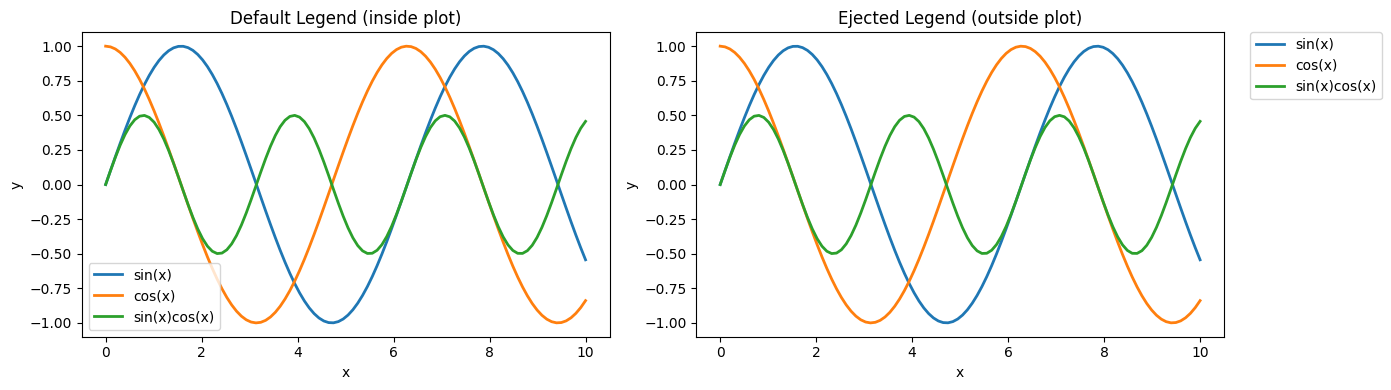

In [2]:
# Create a plot with multiple lines
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))

x = np.linspace(0, 10, 100)

# Without eject_legend
ax1.plot(x, np.sin(x), label='sin(x)', linewidth=2)
ax1.plot(x, np.cos(x), label='cos(x)', linewidth=2)
ax1.plot(x, np.sin(x) * np.cos(x), label='sin(x)cos(x)', linewidth=2)
ax1.legend()
ax1.set_title('Default Legend (inside plot)')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# With eject_legend
ax2.plot(x, np.sin(x), label='sin(x)', linewidth=2)
ax2.plot(x, np.cos(x), label='cos(x)', linewidth=2)
ax2.plot(x, np.sin(x) * np.cos(x), label='sin(x)cos(x)', linewidth=2)
buencolors.eject_legend(ax2)
ax2.set_title('Ejected Legend (outside plot)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

## 2. `rotate_discrete_xticks()` - Rotate X-Axis Labels

Rotates x-axis labels for better readability with long category names.

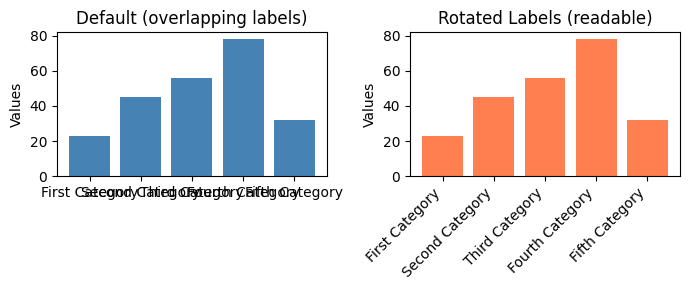

In [3]:
# Create bar plots with long category names
categories = ['First Category', 'Second Category', 'Third Category', 
              'Fourth Category', 'Fifth Category']
values = [23, 45, 56, 78, 32]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3))

# Without rotation
ax1.bar(categories, values, color='steelblue')
ax1.set_title('Default (overlapping labels)')
ax1.set_ylabel('Values')

# With rotation
ax2.bar(categories, values, color='coral')
buencolors.rotate_discrete_xticks(ax2, rotation=45)
ax2.set_title('Rotated Labels (readable)')
ax2.set_ylabel('Values')

plt.tight_layout()
plt.show()

## 3. `grab_legend()` - Extract Legend to Separate Figure

The `grab_legend()` function extracts a legend to a separate figure, useful for creating independent legend files for publications.

**New in this version**: The `remove` parameter controls whether the legend is removed from the original axes:
- `remove=True` (default): Legend is removed from the original plot
- `remove=False`: Legend remains on the original plot

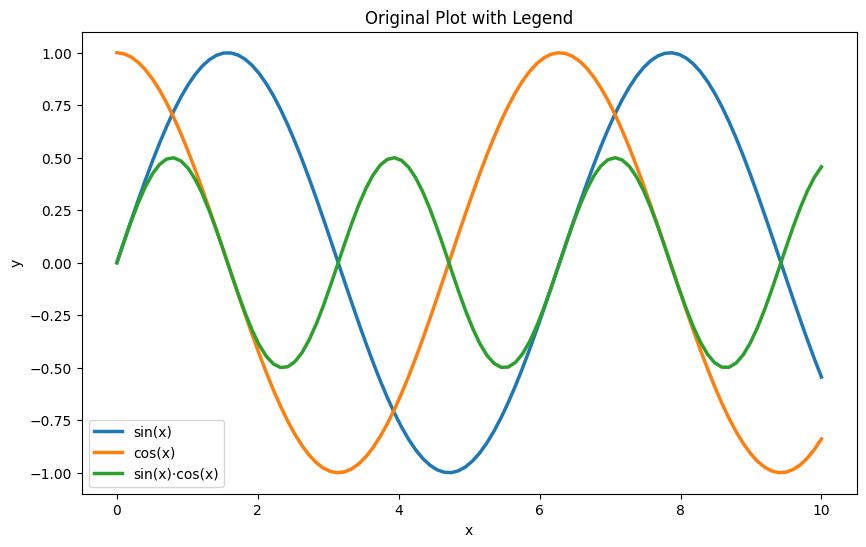

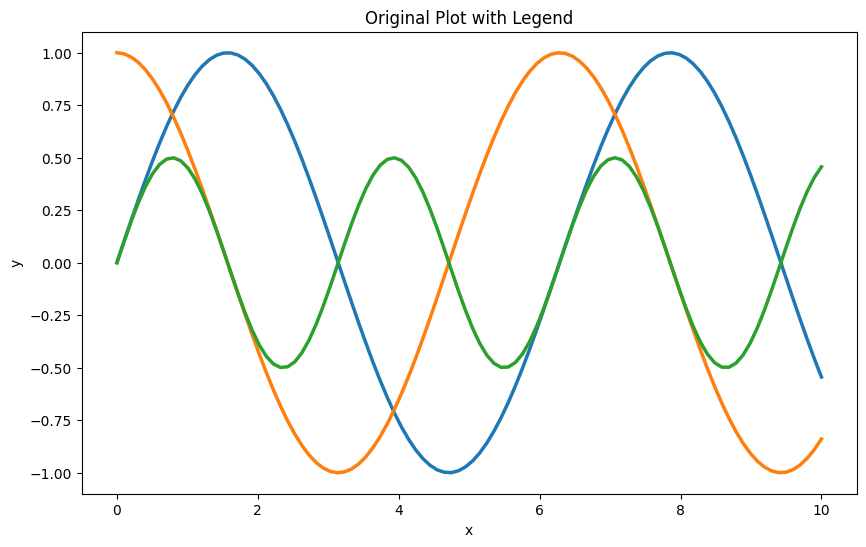

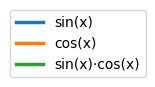

In [4]:
# Create a plot with multiple series
fig, ax = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x), label='sin(x)', linewidth=2.5)
ax.plot(x, np.cos(x), label='cos(x)', linewidth=2.5)
ax.plot(x, np.sin(x) * np.cos(x), label='sin(x)·cos(x)', linewidth=2.5)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Original Plot with Legend')
ax.legend()

plt.show()

# Extract legend (default: remove=True)
# This removes the legend from the original axes
legend_fig = buencolors.grab_legend(ax, remove=True)

# The legend can now be saved separately
# legend_fig.savefig('legend.pdf', bbox_inches='tight')

# Show the plot again - notice the legend is now gone
fig

Original plot still has legend: True


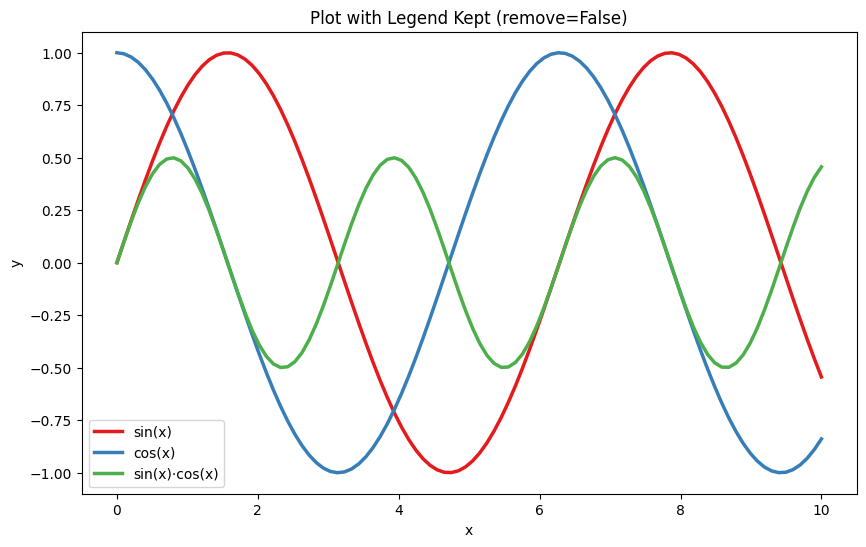

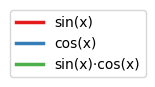

In [5]:
# Example with remove=False: keep the legend on the original plot
fig2, ax2 = plt.subplots(figsize=(10, 6))
x = np.linspace(0, 10, 100)
ax2.plot(x, np.sin(x), label='sin(x)', linewidth=2.5, color='#E41A1C')
ax2.plot(x, np.cos(x), label='cos(x)', linewidth=2.5, color='#377EB8')
ax2.plot(x, np.sin(x) * np.cos(x), label='sin(x)·cos(x)', linewidth=2.5, color='#4DAF4A')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Plot with Legend Kept (remove=False)')
ax2.legend()

# Extract legend but keep it on the plot
legend_fig2 = buencolors.grab_legend(ax2, remove=False)

# Both the extracted legend figure and original plot have the legend
print("Original plot still has legend:", ax2.get_legend() is not None)

plt.show()

## 4. `get_density()` - Compute Point Density

Computes the local density of points for coloring scatter plots by concentration.

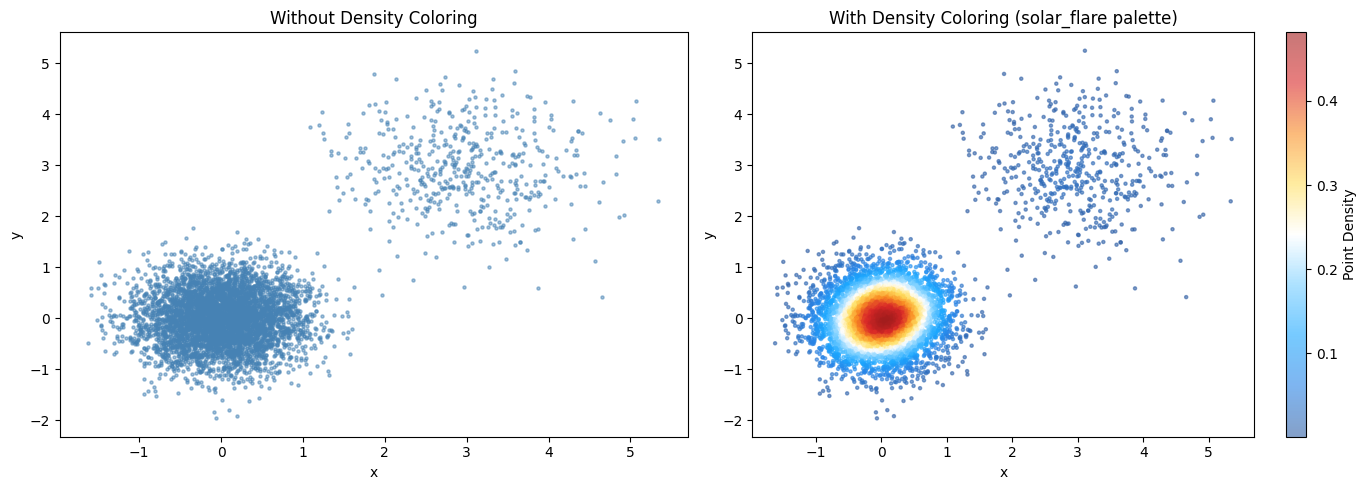

In [6]:
# Create sample data with varying density
n_dense = 5000
n_sparse = 500

x = np.concatenate([
    np.random.normal(0, 0.5, n_dense),
    np.random.normal(3, 0.8, n_sparse)
])

y = np.concatenate([
    np.random.normal(0, 0.5, n_dense),
    np.random.normal(3, 0.8, n_sparse)
])

# Compute density
density = buencolors.get_density(x, y, n=200)

# Plot with color mapped to density
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Without density coloring
ax1.scatter(x, y, s=5, alpha=0.5, color='steelblue')
ax1.set_title('Without Density Coloring')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# With density coloring
sc = ax2.scatter(x, y, c=density, cmap='solar_flare', s=5, alpha=0.6)
plt.colorbar(sc, ax=ax2, label='Point Density')
ax2.set_title('With Density Coloring (solar_flare palette)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

## 5. `shuffle()` - Randomize Data Order

Shuffles various data types (DataFrames, arrays, lists) to prevent plotting artifacts from data ordering.

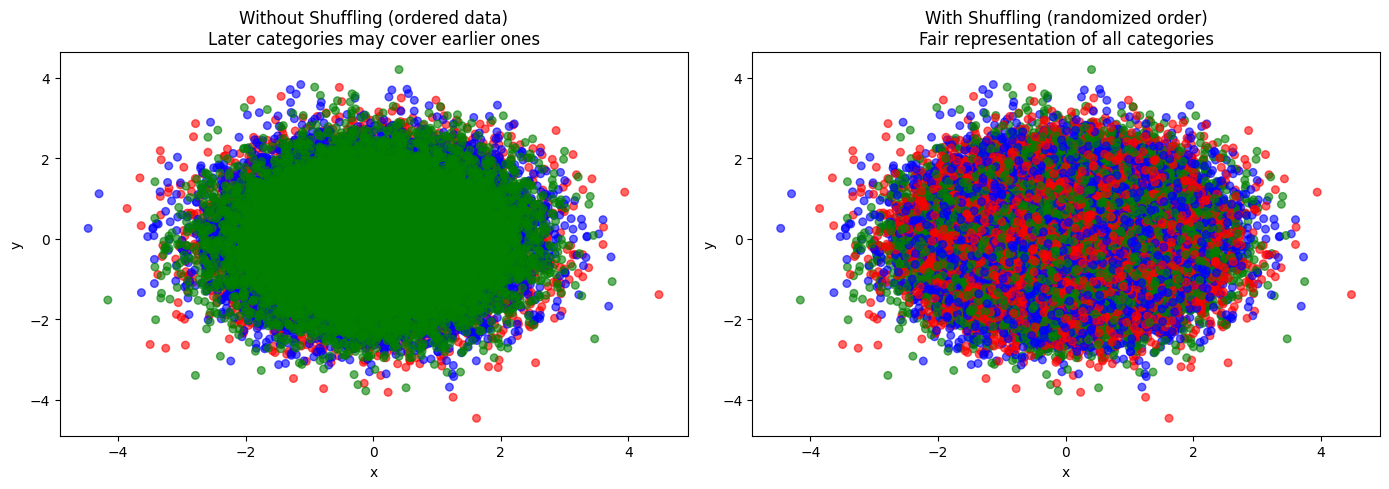


Shuffle also works with:
- NumPy arrays: <class 'numpy.ndarray'>
- Lists: <class 'list'>
- Tuples: <class 'tuple'>


In [7]:
# Create a DataFrame with categories
n_points = 50000
df = pd.DataFrame({
    'x': np.random.randn(n_points),
    'y': np.random.randn(n_points),
    'category': np.repeat(['A', 'B', 'C'], n_points // 3 + 1)[:n_points]
})

# Define colors
color_map = {'A': 'red', 'B': 'blue', 'C': 'green'}
df['color'] = df['category'].map(color_map)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Without shuffling (ordered by category)
ax1.scatter(df['x'], df['y'], c=df['color'], alpha=0.6, s=30)
ax1.set_title('Without Shuffling (ordered data)\nLater categories may cover earlier ones')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# With shuffling
df_shuffled = buencolors.shuffle(df)
ax2.scatter(df_shuffled['x'], df_shuffled['y'], c=df_shuffled['color'], alpha=0.6, s=30)
ax2.set_title('With Shuffling (randomized order)\nFair representation of all categories')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

print("\nShuffle also works with:")
print("- NumPy arrays:", type(buencolors.shuffle(np.array([1, 2, 3, 4, 5]))))
print("- Lists:", type(buencolors.shuffle([1, 2, 3, 4, 5])))
print("- Tuples:", type(buencolors.shuffle((1, 2, 3, 4, 5))))

## 6. `number_to_color()` - Map Values to Colors

Maps numeric values to colors from a palette, supporting both continuous and discrete binning.

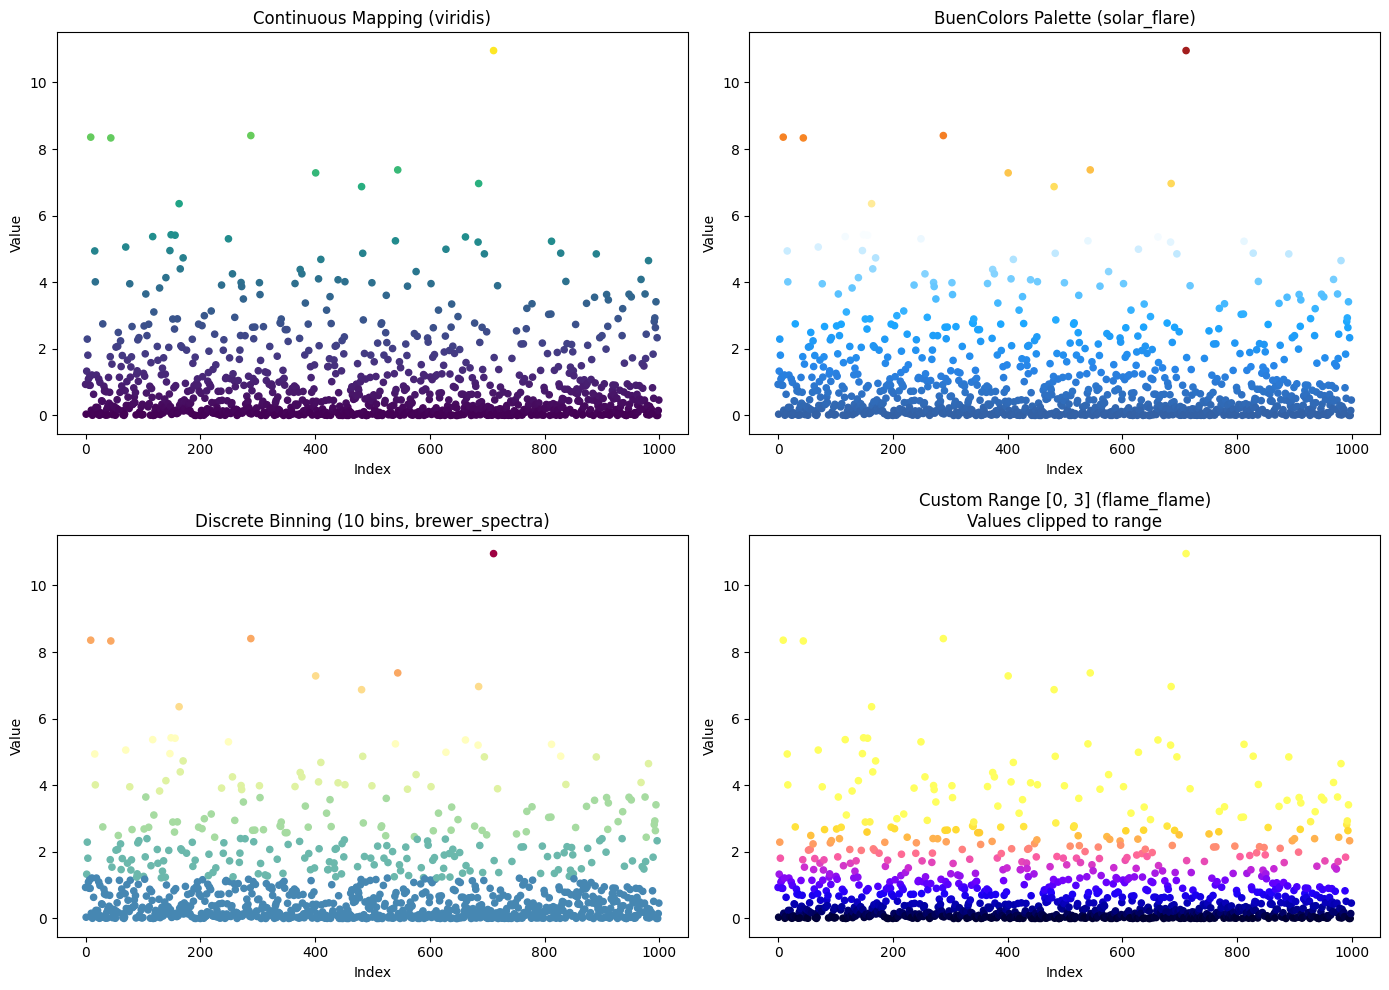

In [8]:
# Generate sample data
n_points = 1000
values = np.random.randn(n_points) ** 2  # Chi-squared-like distribution

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# 1. Continuous mapping with viridis
colors1 = buencolors.number_to_color(values, "viridis")
axes[0].scatter(np.arange(n_points), values, c=colors1, s=20)
axes[0].set_title('Continuous Mapping (viridis)')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Value')

# 2. BuenColors palette
colors2 = buencolors.number_to_color(values, "solar_flare")
axes[1].scatter(np.arange(n_points), values, c=colors2, s=20)
axes[1].set_title('BuenColors Palette (solar_flare)')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Value')

# 3. Discrete binning (like R implementation)
colors3 = buencolors.number_to_color(values, "brewer_spectra", n_bins=10)
axes[2].scatter(np.arange(n_points), values, c=colors3, s=20)
axes[2].set_title('Discrete Binning (10 bins, brewer_spectra)')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Value')

# 4. Custom value range (clipping)
colors4 = buencolors.number_to_color(values, "flame_flame", value_range=(0, 3))
axes[3].scatter(np.arange(n_points), values, c=colors4, s=20)
axes[3].set_title('Custom Range [0, 3] (flame_flame)\nValues clipped to range')
axes[3].set_xlabel('Index')
axes[3].set_ylabel('Value')

plt.tight_layout()
plt.show()

### Combined Example: Density + Shuffle + Number to Color

Combining multiple helper functions for a publication-quality visualization.

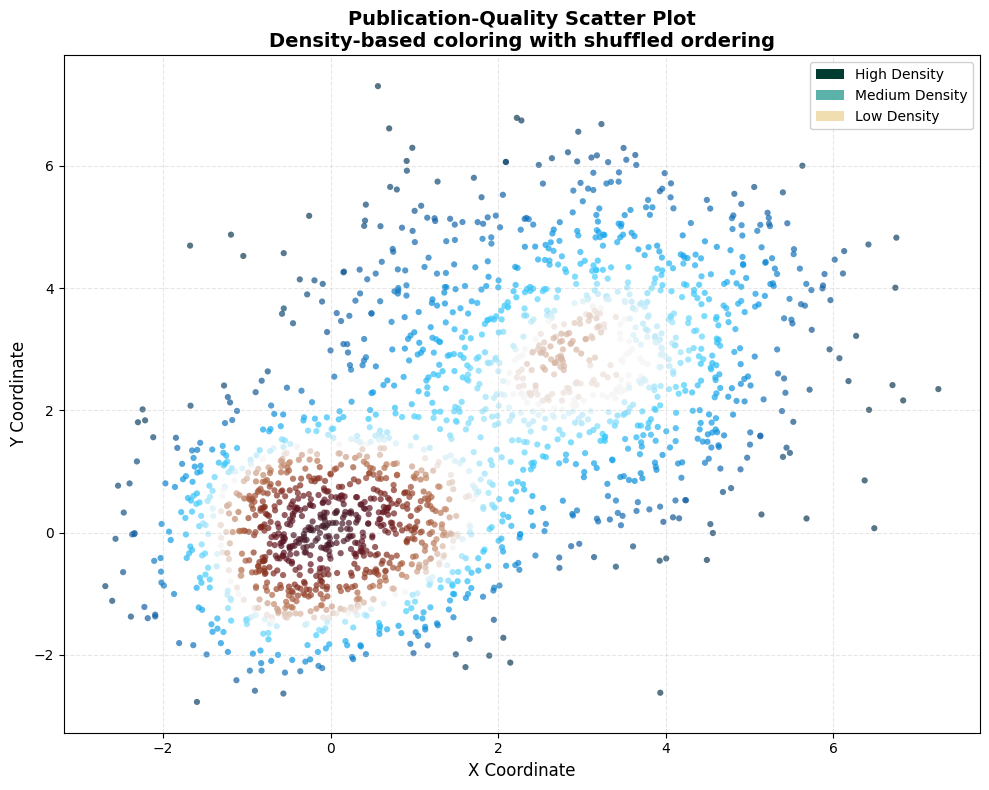

In [9]:
# Create complex data
n = 2000
df = pd.DataFrame({
    'x': np.concatenate([
        np.random.normal(0, 1, n // 2),
        np.random.normal(3, 1.5, n // 2)
    ]),
    'y': np.concatenate([
        np.random.normal(0, 1, n // 2),
        np.random.normal(3, 1.5, n // 2)
    ])
})

# Compute density
df['density'] = buencolors.get_density(df['x'], df['y'], n=200)

# Map density to colors
df['color'] = buencolors.number_to_color(df['density'], 'ocean_earth', n_bins=50)

# Shuffle to prevent plotting artifacts
df = buencolors.shuffle(df)

# Create publication-quality plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(df['x'], df['y'], c=df['color'], s=20, alpha=0.7, edgecolors='none')
ax.set_title('Publication-Quality Scatter Plot\n' + 
             'Density-based coloring with shuffled ordering', 
             fontsize=14, fontweight='bold')
ax.set_xlabel('X Coordinate', fontsize=12)
ax.set_ylabel('Y Coordinate', fontsize=12)
ax.grid(alpha=0.3, linestyle='--')

# Add a custom colorbar legend
from matplotlib.patches import Rectangle
legend_elements = [
    Rectangle((0, 0), 1, 1, fc='#003C30', label='High Density'),
    Rectangle((0, 0), 1, 1, fc='#5AB2A8', label='Medium Density'),
    Rectangle((0, 0), 1, 1, fc='#F0DEB1', label='Low Density')
]
ax.legend(handles=legend_elements, loc='upper right', framealpha=0.9)

plt.tight_layout()
plt.show()

## Summary

The BuenColors helper functions provide:

1. **`eject_legend()`** - Move legends outside plots
2. **`rotate_discrete_xticks()`** - Rotate axis labels for readability
3. **`grab_legend()`** - Extract legends to separate figures
4. **`get_density()`** - Compute point density for scatter plots
5. **`shuffle()`** - Randomize data to prevent plotting artifacts
6. **`number_to_color()`** - Map numeric values to colors

These functions work seamlessly together to create publication-quality visualizations!